## 9.12.3 Reading the Titanic Disaster Dataset 
* Titanic disaster dataset is one of the most popular machine-learning datasets

### Loading the Titanic Dataset via a URL
* Load the Titanic Disaster dataset directly from GitHub:

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')

### Viewing Some of the Rows in the Titanic Dataset
* Dataset contains over 1300 rows, each representing one passenger
* For large datasets, displaying a `DataFrame` shows only the first 30 rows, followed by “…” and the last 30 rows
* View the first five and last five rows with `DataFrame` methods **`head`** and **`tail`**
    * Both return five rows by default

In [3]:
pd.set_option('precision', 2)  # format for floating-point values

In [4]:
titanic.head()

Unnamed: 0 survived     sex    age passengerClass
0    Allen, Miss. Elisabeth Walton      yes  female  29.00            1st
1   Allison, Master. Hudson Trevor      yes    male   0.92            1st
2     Allison, Miss. Helen Loraine       no  female   2.00            1st
3  Allison, Mr. Hudson Joshua Crei       no    male  30.00            1st
4  Allison, Mrs. Hudson J C (Bessi       no  female  25.00            1st

In [5]:
titanic.tail()

Unnamed: 0 survived     sex   age passengerClass
1304       Zabour, Miss. Hileni       no  female  14.5            3rd
1305      Zabour, Miss. Thamine       no  female   NaN            3rd
1306  Zakarian, Mr. Mapriededer       no    male  26.5            3rd
1307        Zakarian, Mr. Ortin       no    male  27.0            3rd
1308         Zimmerman, Mr. Leo       no    male  29.0            3rd

* pandas adjusts each column’s width, based on the widest value in the column or based on the column name, whichever is wider
* The value in the age column of row `1305` is `NaN` (not a number), indicating a missing value in the dataset

### Customizing the Column Names
* First column has a strange name (`'Unnamed: 0'`)
* Can clean that up by setting the column names

In [6]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']

In [7]:
titanic.head()

name survived     sex    age class
0    Allen, Miss. Elisabeth Walton      yes  female  29.00   1st
1   Allison, Master. Hudson Trevor      yes    male   0.92   1st
2     Allison, Miss. Helen Loraine       no  female   2.00   1st
3  Allison, Mr. Hudson Joshua Crei       no    male  30.00   1st
4  Allison, Mrs. Hudson J C (Bessi       no  female  25.00   1st

## 9.12.4 Simple Data Analysis with the Titanic Disaster Dataset 
* Can use pandas to perform some simple analysis.
* Calling `describe` on a `DataFrame` containing both numeric and non-numeric columns produces descriptive statistics _only for the numeric columns_
    * in this case, just the `age` column

In [8]:
titanic.describe()

age
count  1046.00
mean     29.88
std      14.41
min       0.17
25%      21.00
50%      28.00
75%      39.00
max      80.00

## 9.12.4 Simple Data Analysis with the Titanic Disaster Dataset (cont.)
* Discrepancy in the `count` (`1046`) vs. the dataset’s number of rows (1309—the last row’s index was `1308` when we called `tail`)
    * Only `1046` (the `count` above) of the records contained an age
    * Rest were _missing_ and marked as `NaN`
* When performing calculations, Pandas _ignores missing data (`NaN`) by default_
* For the `1046` people with valid ages
    * average (`mean`) age was `29.88` years old
    * youngest passenger (`min`) was just over two months old (`0.17 * 12` is `2.04`)
    *  oldest (`max`) was 80
    * Median age was `28` (indicated by the `50%` quartile)
    * `25%` quartile is the median age in the first half of the passengers (sorted by age)
    * `75%` quartile is the median of the second half of passengers

## 9.12.4 Simple Data Analysis with the Titanic Disaster Dataset (cont.)
* Let’s say you want to determine some statistics about people who survived
* Can compare the `survived` column to `'yes'` to get a new `Series` containing `True/False` values, then use `describe` to summarize the results

In [9]:
(titanic.survived == 'yes').describe()

count      1309
unique        2
top       False
freq        809
Name: survived, dtype: object

* For non-numeric data, `describe` displays different descriptive statistics:
    * `count` is the total number of items in the result
    * `unique` is the number of unique values (`2`) in the result—`True` (survived) and `False` (died)
    * `top` is the most frequently occurring value in the result
    * `freq` is the number of occurrences of the `top` value

## 9.12.5 Passenger Age Histogram
* Visualization helps you get to know your data
* Pandas has many built-in visualization capabilities that are implemented with Matplotlib
* To use them in Jupyter, first enable Matplotlib support 
    * "inline" used only in Jupyter, not IPython interactive mode

In [10]:
%matplotlib inline 

* A histogram visualizes the distribution of numerical data over a range of values
* A `DataFrame`’s **`hist`** method analyzes each numerical column’s data and produces a separate histogram for each numerical column

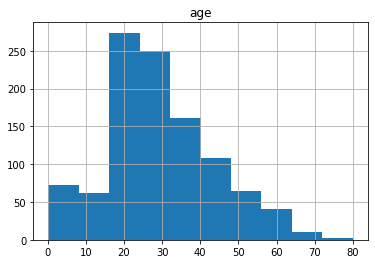

In [11]:
histogram = titanic.hist()

------
&copy;1992&ndash;2020 by Pearson Education, Inc. All Rights Reserved. This content is based on Chapter 5 of the book [**Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud**](https://amzn.to/2VvdnxE).

DISCLAIMER: The authors and publisher of this book have used their 
best efforts in preparing the book. These efforts include the 
development, research, and testing of the theories and programs 
to determine their effectiveness. The authors and publisher make 
no warranty of any kind, expressed or implied, with regard to these 
programs or to the documentation contained in these books. The authors 
and publisher shall not be liable in any event for incidental or 
consequential damages in connection with, or arising out of, the 
furnishing, performance, or use of these programs.                  